<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : analisi della commestibilità dei funghi



Lo scopo del progetto è quello di predire se dato un fungo sconosciuto, esso sia commestibile o meno, sulla base dell'integrazione di diverse funzionalità di Machine learning offerte da librerie software.

Il dataset utilizzato è Mushrooms 2 UCI, della Philipps-University (Marburg, Germania), ed include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi per specie).
Ogni fungo è identificato come commestibile, velenoso, o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).

I funghi appartenenti al suddetto dataset sono stati ottenuti a partire da un dataset primario contenente informazioni su alcuni funghi descritti all'interno di un'enciclopedia.

Seguono gli attributi del dataset.

Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-or-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w




## 1 Analisi dei dati


### 1.1 Importazione delle librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.metrics as mt

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1.2 Importazione del dataset


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data.csv") 

In [3]:
print("Dimensionalità del dataset:")
print("# Istanze :", df.shape[0])
print("# Attributi :", df.shape[1]-1)
print("Feature Target : class")

Dimensionalità del dataset:
# Istanze : 61069
# Attributi : 20
Feature Target : class



Abbiamo deciso di effettuare una conversione delle variabili categoriche in variabili numeriche ai fini di semplificarne la gestione: 

In [4]:
column_values = df['class'].unique()
count = 0 
print('Class conversion:')
for u in column_values: 
      df['class'] = df['class'].replace(u,count)
      print("\t",u, "->", count)
      count += 1

Class conversion:
	 p -> 0
	 e -> 1


In [5]:
'''
for col in df.columns:
  if col != 'cap-diameter' and col!='stem-height' and col!='stem-width'  :
    column_values = df[col].unique()
    count = 0 
    print(col)
    for u in column_values: 
      df[col] = df[col].replace(u,count)
      print("\t",u, "->", count)
      count += 1
    print("---------------")
'''

'\nfor col in df.columns:\n  if col != \'cap-diameter\' and col!=\'stem-height\' and col!=\'stem-width\'  :\n    column_values = df[col].unique()\n    count = 0 \n    print(col)\n    for u in column_values: \n      df[col] = df[col].replace(u,count)\n      print("\t",u, "->", count)\n      count += 1\n    print("---------------")\n'

In [6]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,0,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,0,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,0,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,0,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,0,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,0,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,0,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,0,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,0,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


### 1.3 Bilanciamento

Verifichiamo ora che il dataset sia bilanciato. Qualora non lo fosse potremmo applicare metodi di ricampionamento come oversampling e undersampling.

In [7]:
col = ['red','green']
lab = ['Poisonous','Edible']
valori = df['class'].value_counts()/df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=lab, values=valori, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=col, line=dict(color='white', width=2)))
fig.update_layout(
    title_text="Mushrooms edibility",
    title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

Vista e considerata la similarità delle percentuali, il dataset risulta essere bilanciato

### 1.4 Correlazione

Verifichiamo a questo punto la correlazione tra i diversi attributi utilizzando la matrice di correlazione.

#### 1.4.1 Correlazione features numeriche

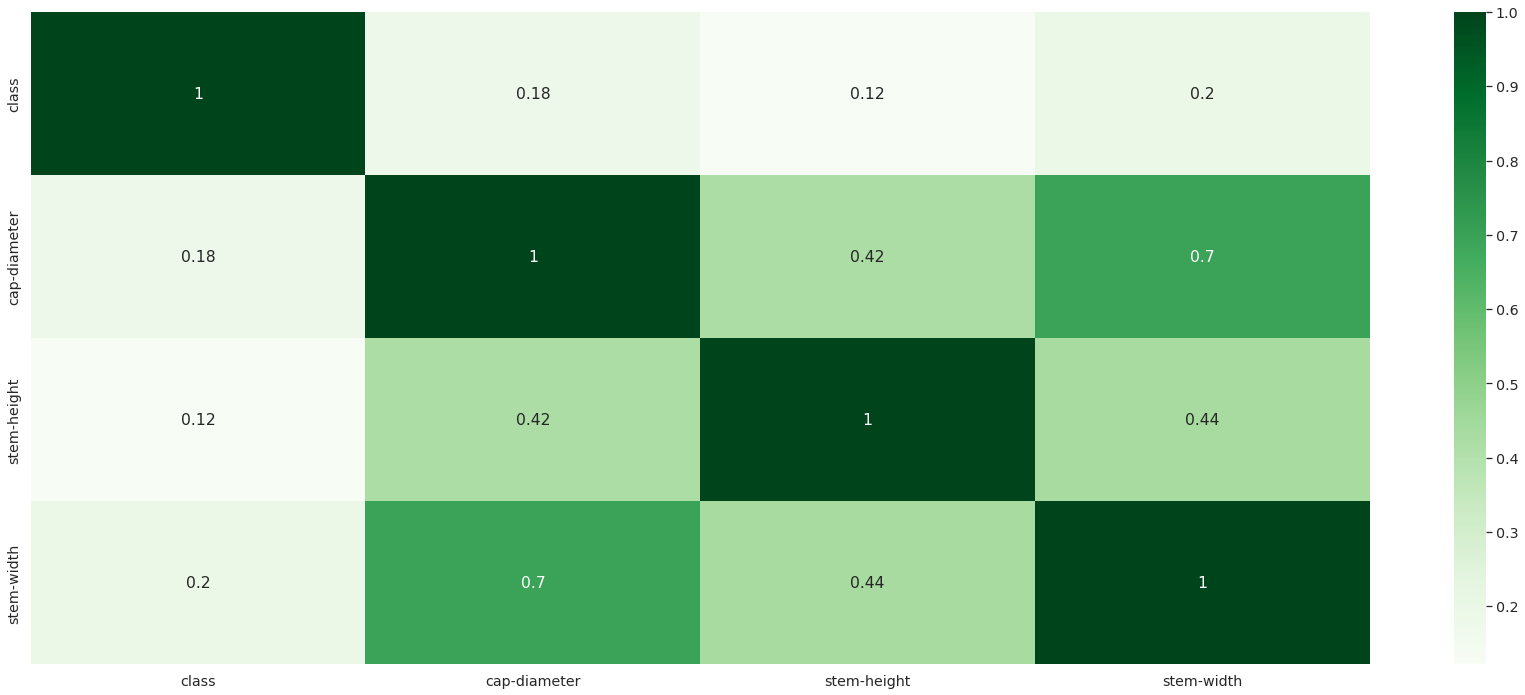

In [8]:
corr = df.corr()
sns.set(font_scale=1.30)
fig = plt.figure(figsize=(30,12))
sns.heatmap(corr,annot=True, cmap='Greens')
sns.set_palette("bright")
sns.set_style('white')
plt.show()

La matrice di correlazione mette in luce come la commestibilità dei funghi sia leggermente correlata al diametro del cappuccio, l'altezza e la larghezza dello stelo.

Vediamo come variano le distribuzioni dei suddetti attributi

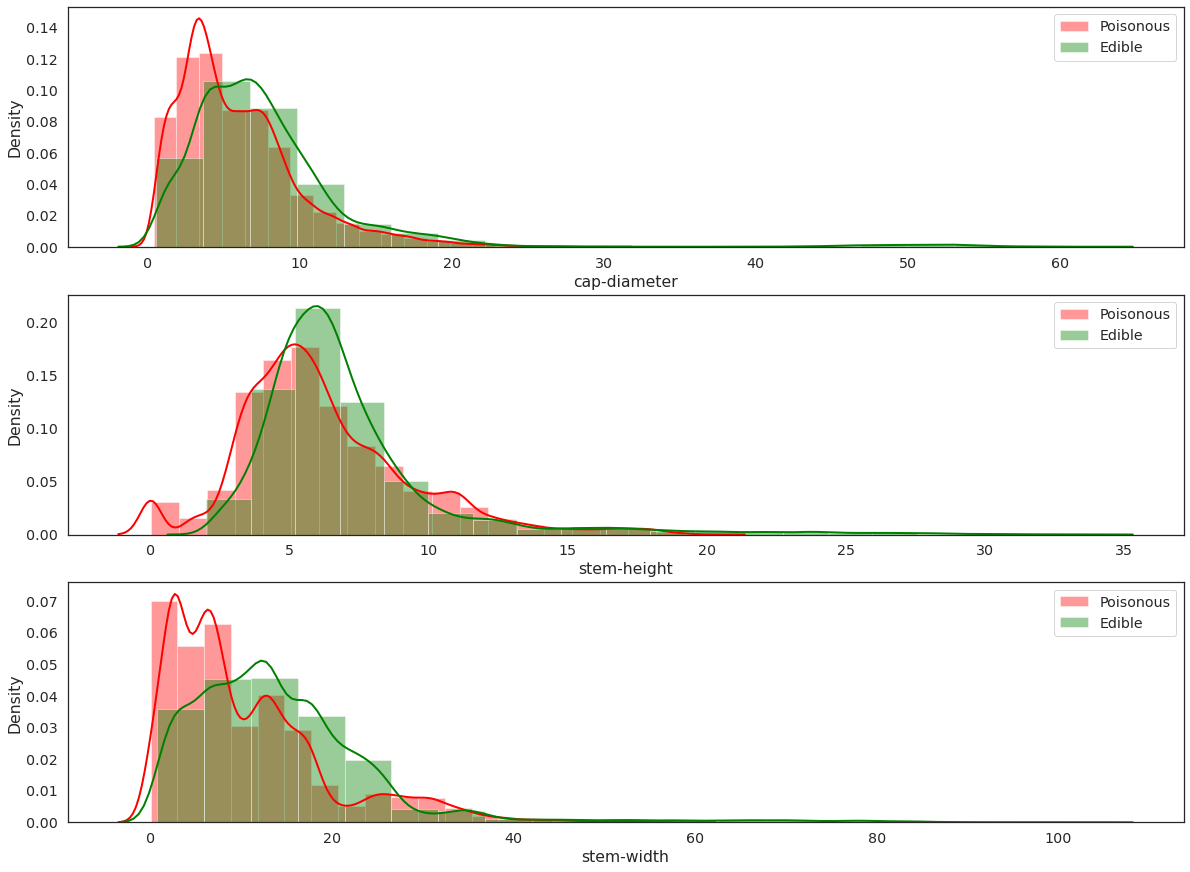

In [9]:
fig = plt.figure(figsize=(20,15))
index = 1
for col in ['cap-diameter','stem-height','stem-width']:
    fig.add_subplot(3,1,index)
    sns.distplot(df[df['class']==0][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Poisonous', color='red')
    sns.distplot(df[df['class']==1][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Edible', color='green')
    index += 1
    plt.legend()

plt.show()


Si evince come gli attributi messi in luce dalla matrice di covarianza tendano ad avere una distribuzione gaussiana e a variare in maniera simile.



#### 1.4.2 Correlazione variabili categoriche

Andiamo ora a vedere come sono legate le variabili categoriche con la commestibilità. 

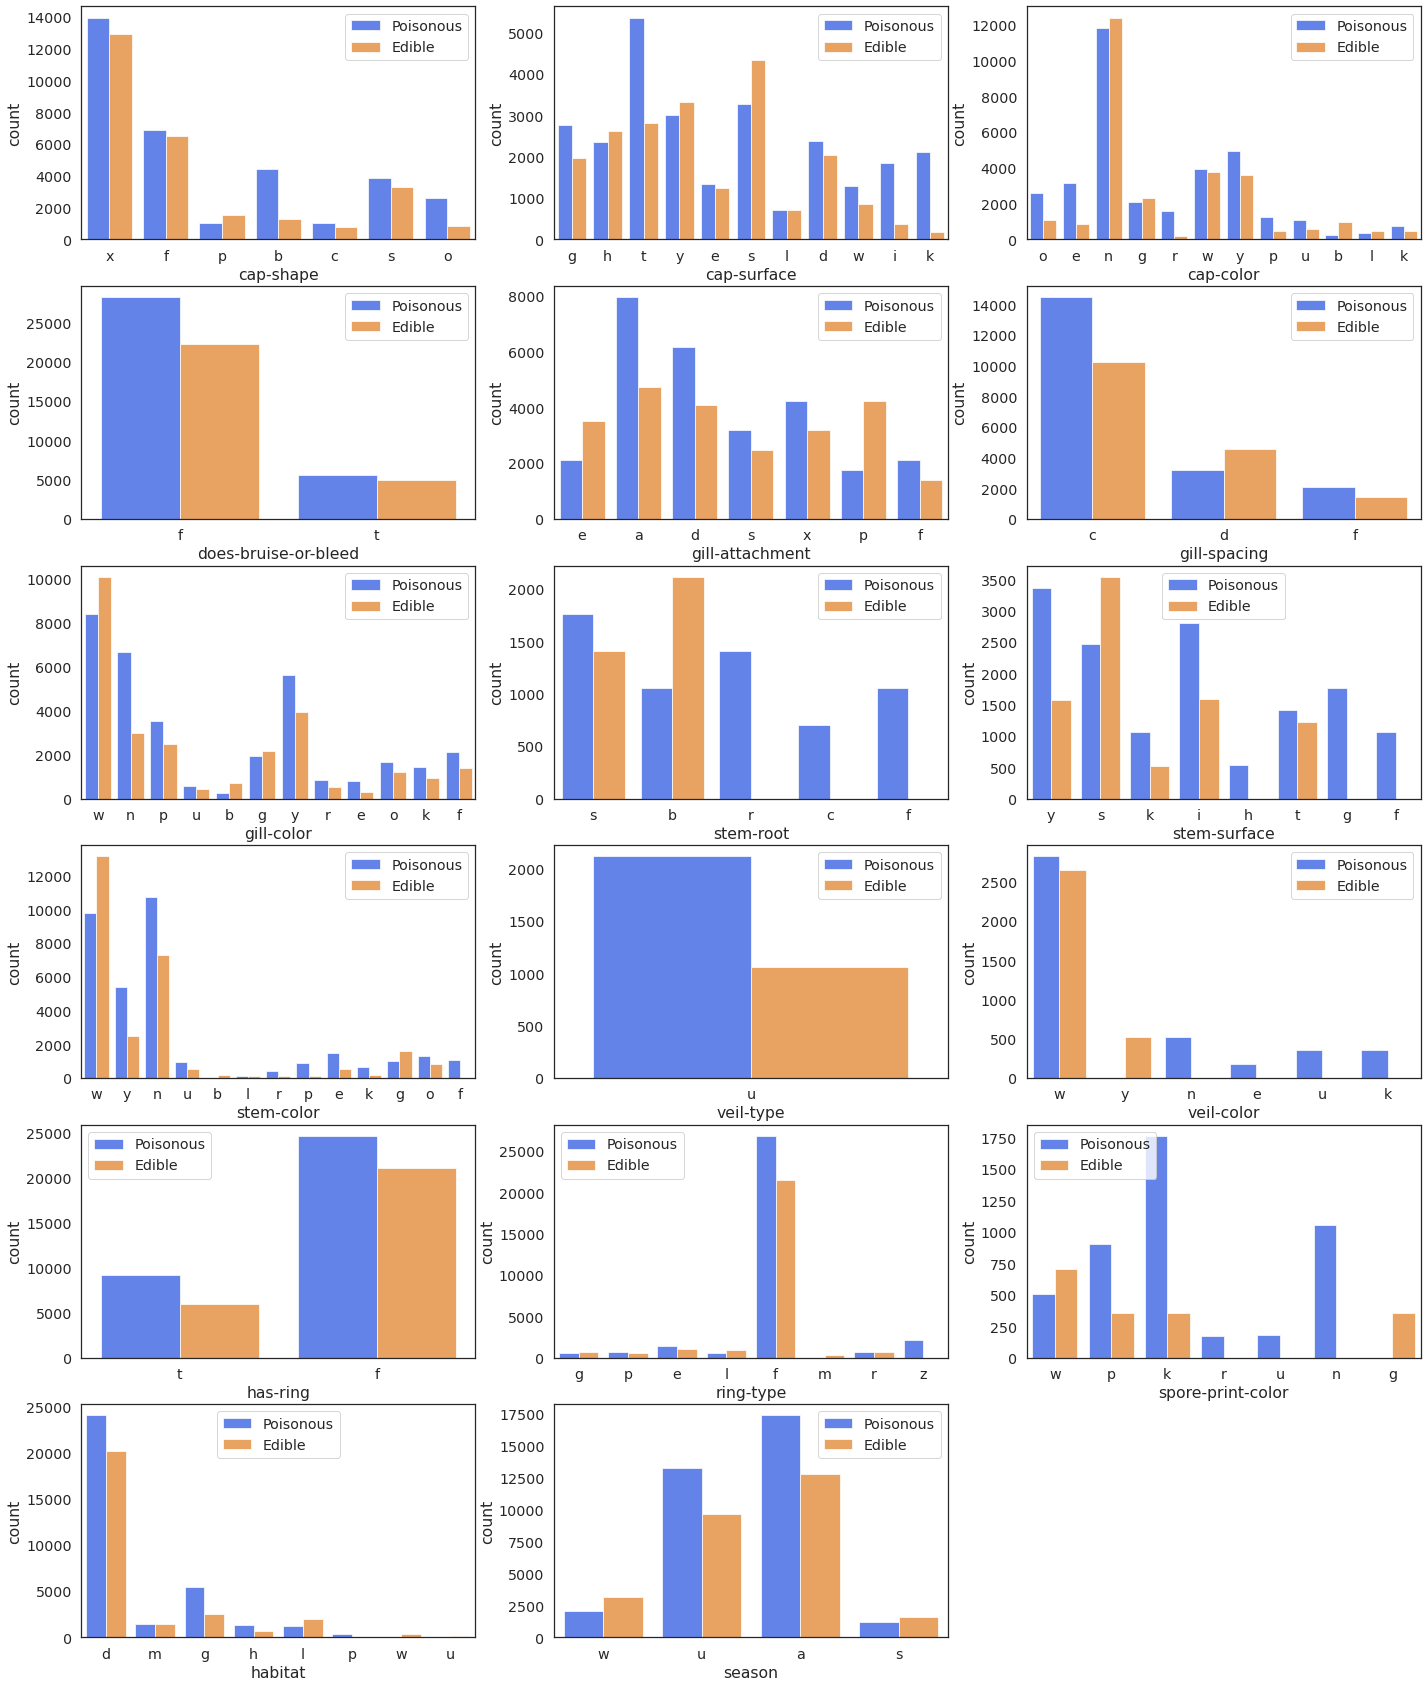

In [10]:
fig = plt.figure(figsize=(24, 30))
i = 1
for col in df.columns:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(6,3,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(['Poisonous','Edible'])
        i += 1
plt.show()

La seguente funzione si occupa di calcolare la probabilità che un fungo sia commestibile a partire da un valore di un attributo passato come parametro

In [11]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']==1)].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['Feature value','probability'])

#### 1.4.2 Studio velenosità dei funghi a partire dalle features

Andiamo quindi a cercare, impostando una threshold, quali funghi siano più o meno probabilmente commestibili.

In [12]:
#Probabilità che un fungo sia commestibile a partire dai diversi attributi
THRESHOLD = 0.2
for col in df.columns:
  if col != 'class':
    print(col)
    p = cond_prob(col)
    lowerData = p[p['probability']<THRESHOLD]
    upperData = p[p['probability']>1-THRESHOLD]
    if not lowerData.empty:
      print(lowerData)
    if not upperData.empty:
      print(upperData)

cap-diameter
      Feature value  probability
4             14.64     0.142857
16            17.40     0.142857
19            13.00     0.111111
48            14.96     0.125000
65            16.77     0.000000
...             ...          ...
2566          30.34     0.000000
2567          22.90     0.000000
2568          22.85     0.000000
2569          21.80     0.000000
2570          20.42     0.000000

[264 rows x 2 columns]
      Feature value  probability
98            15.31     0.875000
499           12.69     0.823529
517           11.09     0.814815
600           13.41     0.857143
777           11.62     0.857143
...             ...          ...
2487          54.64     1.000000
2488          46.29     1.000000
2489          52.19     1.000000
2490          51.45     1.000000
2491          55.11     1.000000

[550 rows x 2 columns]
cap-shape
cap-surface
   Feature value  probability
9              i     0.165843
10             k     0.078593
cap-color
  Feature value  probabil

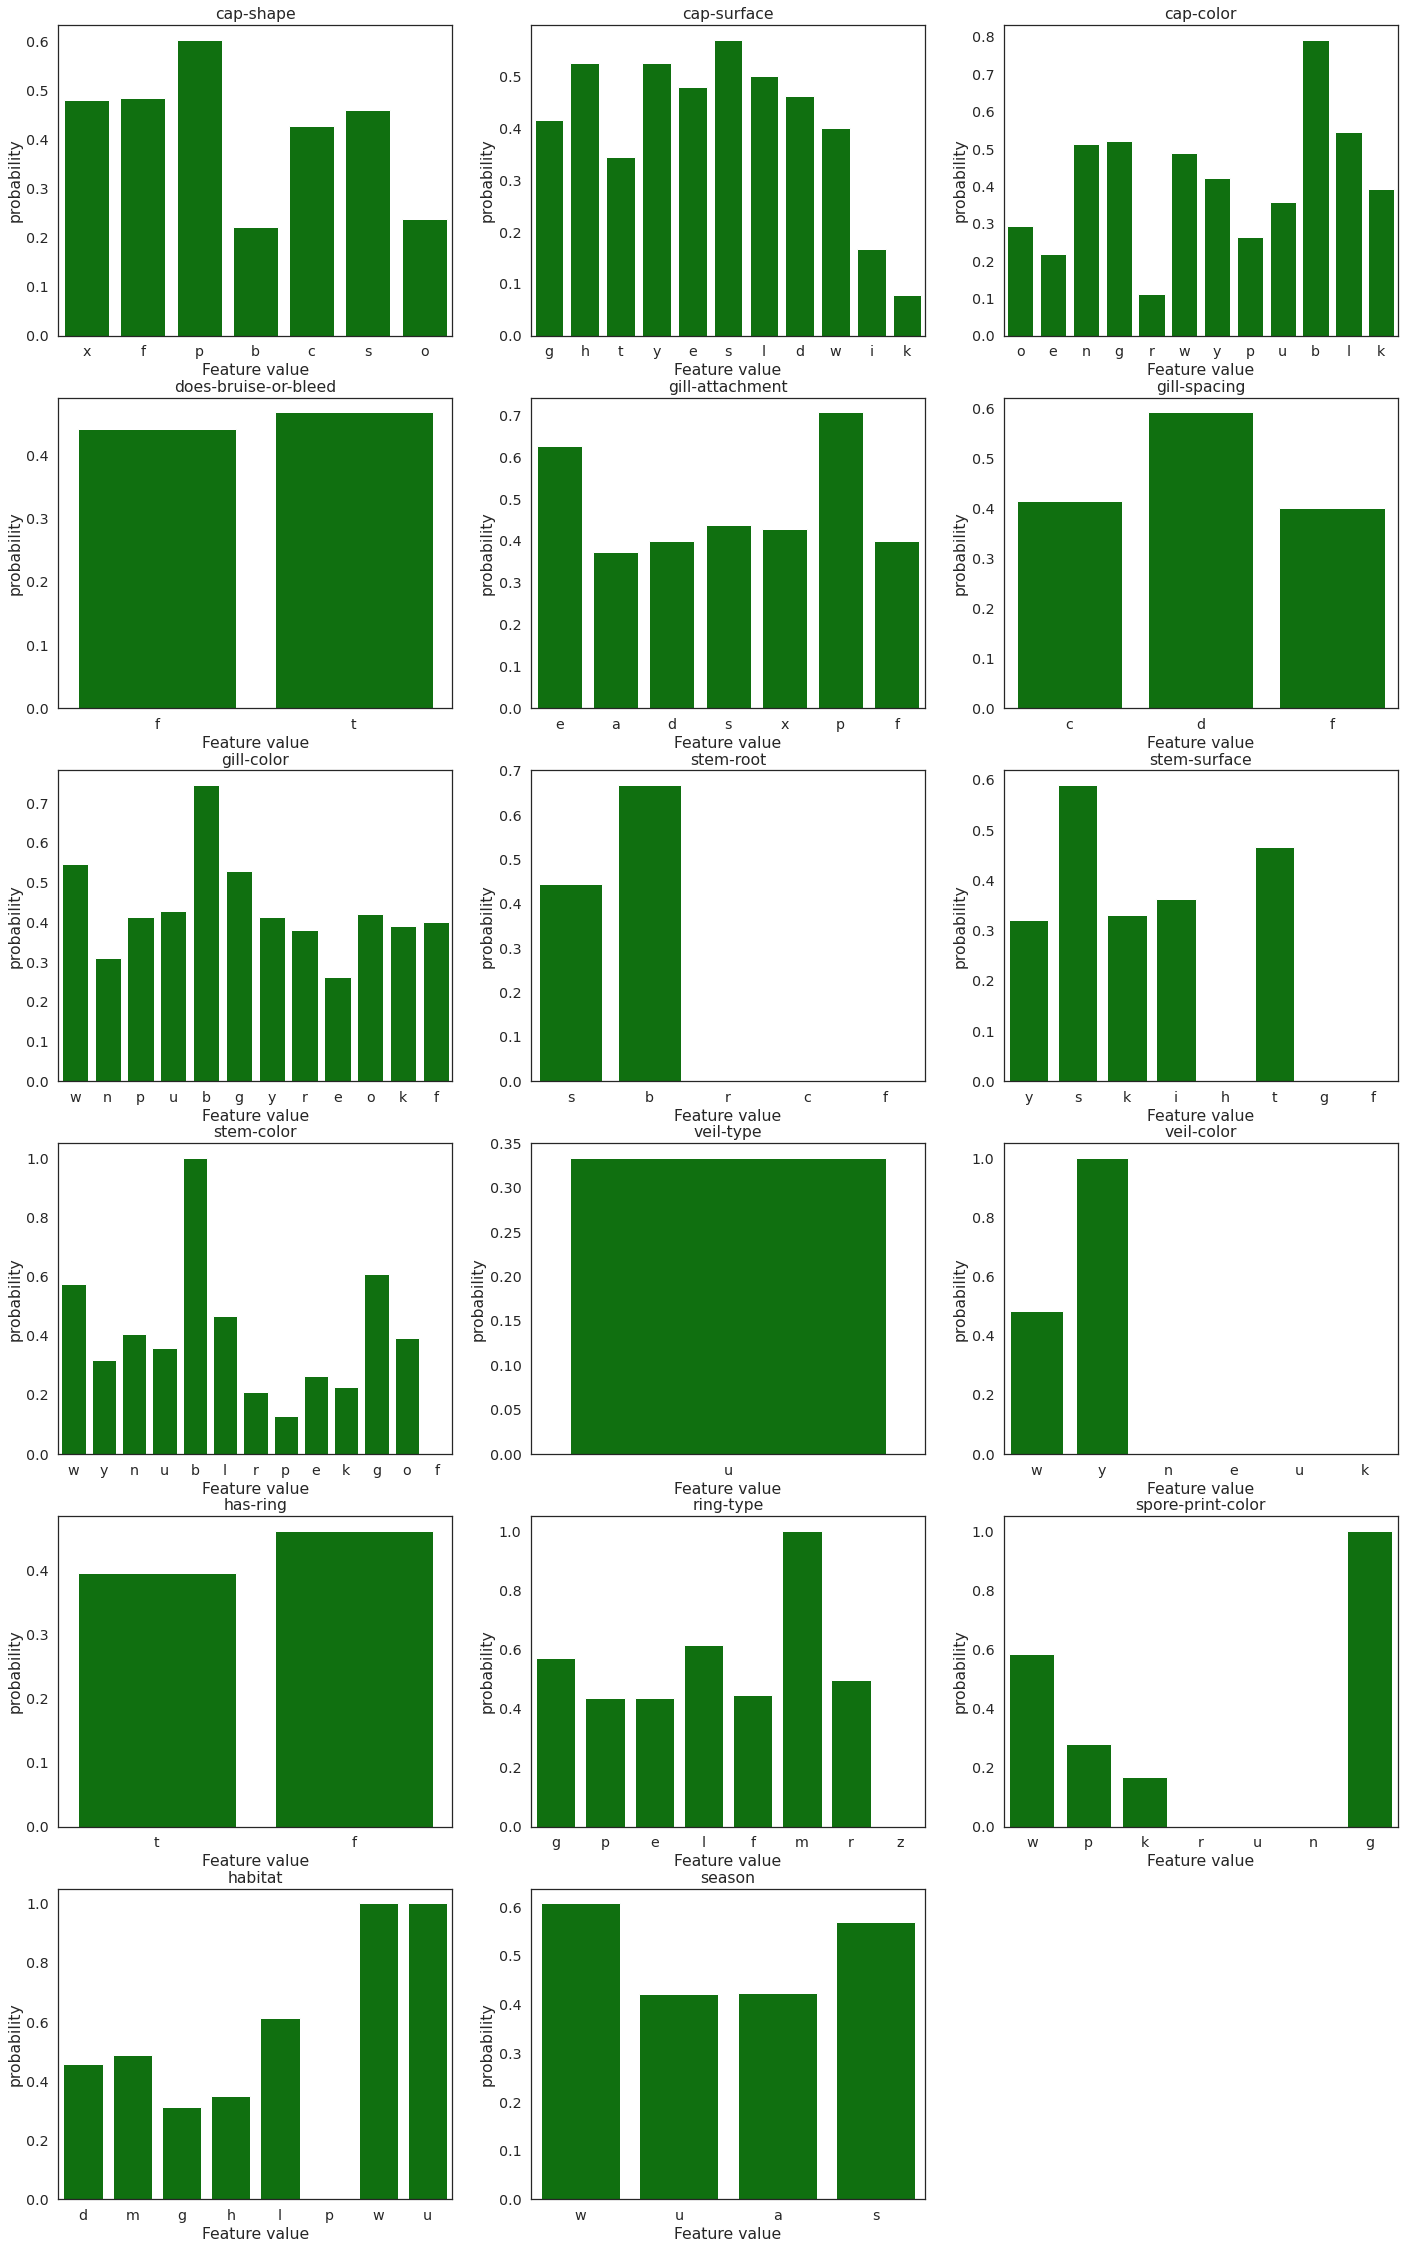

In [13]:
#Probabilità che un fungo sia commestibile a partire dai diversi attributi
fig = plt.figure(figsize=(24, 40))
i=1
for col in df.columns:
  if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width':
        fig.add_subplot(6,3,i)
        p = cond_prob(col)
        sns.barplot(x = 'Feature value', y = 'probability', data=p, color='green')
        plt.title(col)
        i+=1
plt.show()

In [14]:
#Attributes null values ratio
a = df.columns[df.isna().any()].tolist()
for i in a :
    print(i)
    print('#null : {0:d} '.format(sum(pd.isnull(df[i]))))
    print('null ratio: {0:5.3f}'.format(sum(pd.isnull(df[i]))/df.shape[0]))
    print('')

cap-surface
#null : 14120 
null ratio: 0.231

gill-attachment
#null : 9884 
null ratio: 0.162

gill-spacing
#null : 25063 
null ratio: 0.410

stem-root
#null : 51538 
null ratio: 0.844

stem-surface
#null : 38124 
null ratio: 0.624

veil-type
#null : 57892 
null ratio: 0.948

veil-color
#null : 53656 
null ratio: 0.879

ring-type
#null : 2471 
null ratio: 0.040

spore-print-color
#null : 54715 
null ratio: 0.896



## 2 Manipolazione dati

## 2.1 